# Preprocessing dengan NLP

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('Tweets.csv', delimiter = ',')

In [3]:
dataset

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


## Delete Unnecessary Data

In [4]:
# Remove the specified column from the dataset
dataset = dataset.drop('tweet_id', axis=1)
dataset = dataset.drop('airline_sentiment_confidence', axis=1)
dataset = dataset.drop('negativereason', axis=1)
dataset = dataset.drop('negativereason_confidence', axis=1)
dataset = dataset.drop('airline', axis=1)
dataset = dataset.drop('airline_sentiment_gold', axis=1)
dataset = dataset.drop('name', axis=1)
dataset = dataset.drop('negativereason_gold', axis=1)
dataset = dataset.drop('retweet_count', axis=1)
dataset = dataset.drop('tweet_coord', axis=1)
dataset = dataset.drop('tweet_created', axis=1)
dataset = dataset.drop('tweet_location', axis=1)
dataset = dataset.drop('user_timezone', axis=1)

In [5]:
dataset

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


## Cleaning the texts

In [6]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []

for i in range(0, 5000):
    # Removing numbers and symbols (10 poin)
    review = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
    print(review)
    # Casefolding
    review = review.lower()
    print(review)
    # Tokenizing
    review = review.split()
    print(review)
    # Stemming with NLTK
    ps = PorterStemmer()
    # Filtering (stopword removal)
    all_stopwords = stopwords.words('english')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Streaming output truncated to the last 5000 lines.
 united thank you 
['united', 'thank', 'you']
 united  perfectomobile I have to admit that not only the app is good but have lots of useful func  such the  live  seat map   Congrats
 united  perfectomobile i have to admit that not only the app is good but have lots of useful func  such the  live  seat map   congrats
['united', 'perfectomobile', 'i', 'have', 'to', 'admit', 'that', 'not', 'only', 'the', 'app', 'is', 'good', 'but', 'have', 'lots', 'of', 'useful', 'func', 'such', 'the', 'live', 'seat', 'map', 'congrats']
 united still waiting   our bags  Web STILL can t tell me its location   How come  UPS  FedEx can tell u at any given minute where it is 
 united still waiting   our bags  web still can t tell me its location   how come  ups  fedex can tell u at any given minute where it is 
['united', 'still', 'waiting', 'our', 'bags', 'web', 'still', 'can', 't', 'tell', 'me', 'its', 'location', 'how', 'come', 'ups', 'fedex', 'can', 'tell

In [7]:
corpus

['virginamerica dhepburn said',
 'virginamerica plu ad commerci experi tacki',
 'virginamerica today must mean need take anoth trip',
 'virginamerica realli aggress blast obnoxi entertain guest face amp littl recours',
 'virginamerica realli big bad thing',
 'virginamerica serious would pay flight seat play realli bad thing fli va',
 'virginamerica ye nearli everi time fli vx ear worm go away',
 'virginamerica realli miss prime opportun men without hat parodi http co mwpg grezp',
 'virginamerica well',
 'virginamerica amaz arriv hour earli good',
 'virginamerica know suicid second lead caus death among teen',
 'virginamerica lt pretti graphic much better minim iconographi',
 'virginamerica great deal alreadi think nd trip australia amp even gone st trip yet p',
 'virginamerica virginmedia fli fabul seduct sky u take stress away travel http co ahlxhhkiyn',
 'virginamerica thank',
 'virginamerica sfo pdx schedul still mia',
 'virginamerica excit first cross countri flight lax mco heard n

In [8]:
all_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Creating the Bag of Words model

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5100)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:5000, 0].values

In [10]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Machine Learning Model Selection

## Training the Naive Bayes model on the Training set

In [12]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Training the Logistic Regression model on the Training set

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Training the K-NN model on the Training set

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Training the SVM model on the Training set

In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Training the Kernel SVM model on the Training set

In [16]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Training the Decision Tree Classification model on the Training set

In [17]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Training the Random Forest Classification model on the Training set

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting the Test set results

In [19]:
# Predicting the Test set results (3 poin)
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['negative' 'negative']
 ['negative' 'negative']
 ['negative' 'negative']
 ...
 ['negative' 'neutral']
 ['positive' 'positive']
 ['positive' 'negative']]


## Making the Confusion Matrix and Evaluation Models

In [21]:
import seaborn as sns
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Fungsi untuk melatih dan mengevaluasi model
def train_and_evaluate_model(X_train, X_test, y_train, y_test, classifier):
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred , average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return cm, accuracy, precision, recall, f1

Model: Naive Bayes
Confusion Matrix:
 [[369 115 124]
 [ 65  75  69]
 [ 42  24 117]]
Accuracy: 0.561
Precision: 0.614
Recall: 0.561
F1-Score: 0.575

Model: Logistic Regression
Confusion Matrix:
 [[532  55  21]
 [ 86 102  21]
 [ 34  27 122]]
Accuracy: 0.756
Precision: 0.748
Recall: 0.756
F1-Score: 0.751

Model: KNN
Confusion Matrix:
 [[380 185  43]
 [ 77 100  32]
 [ 38  42 103]]
Accuracy: 0.583
Precision: 0.637
Recall: 0.583
F1-Score: 0.601

Model: SVM (Linear)
Confusion Matrix:
 [[518  64  26]
 [ 79 109  21]
 [ 30  26 127]]
Accuracy: 0.754
Precision: 0.750
Recall: 0.754
F1-Score: 0.752

Model: SVM (rbf)
Confusion Matrix:
 [[586  14   8]
 [137  61  11]
 [ 72  23  88]]
Accuracy: 0.735
Precision: 0.729
Recall: 0.735
F1-Score: 0.702

Model: Decision Tree
Confusion Matrix:
 [[482  91  35]
 [ 93  97  19]
 [ 56  30  97]]
Accuracy: 0.676
Precision: 0.675
Recall: 0.676
F1-Score: 0.674

Model: Random Forest
Confusion Matrix:
 [[546  43  19]
 [107  86  16]
 [ 56  31  96]]
Accuracy: 0.728
Precision

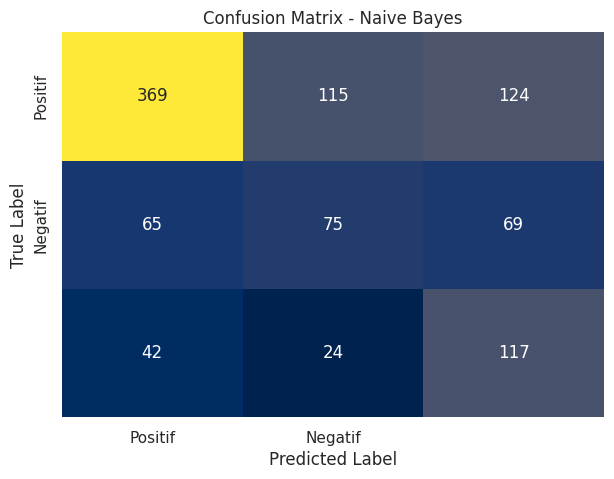

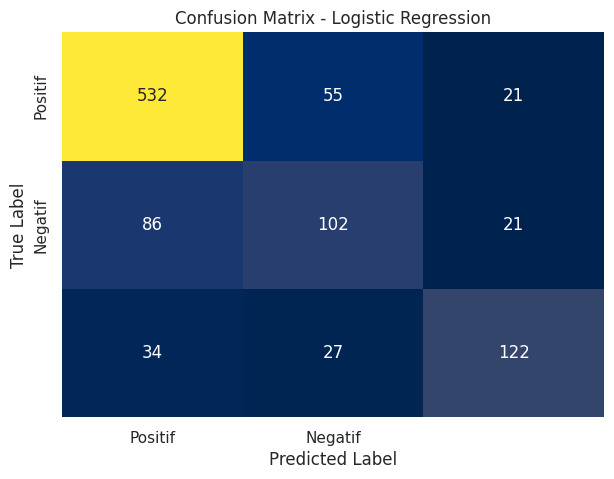

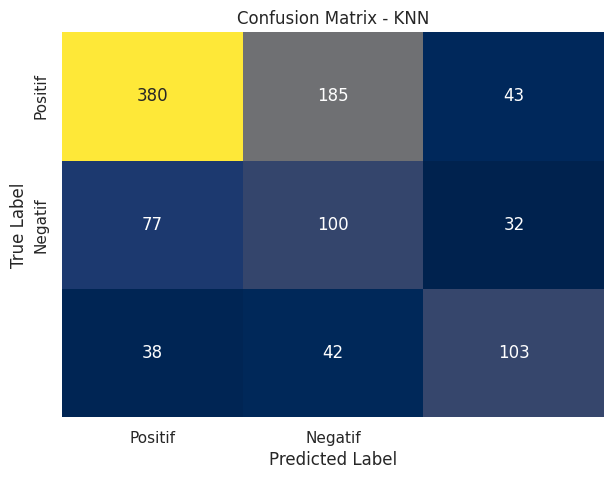

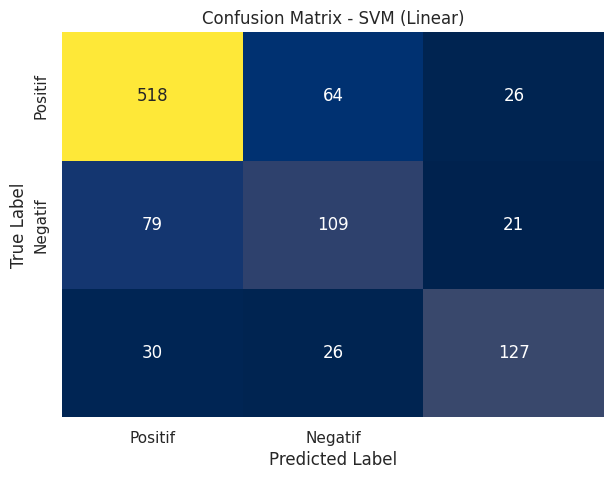

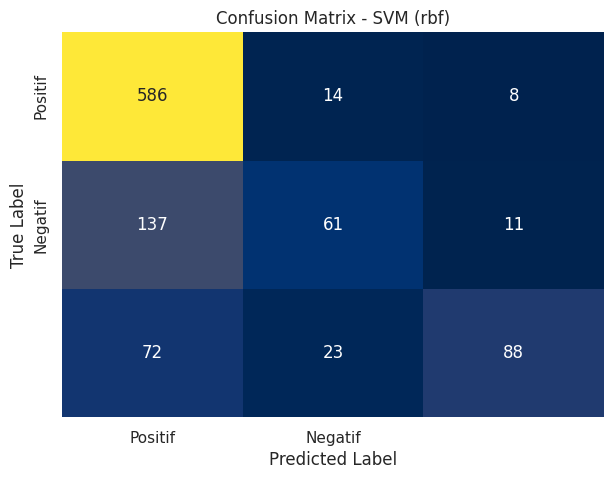

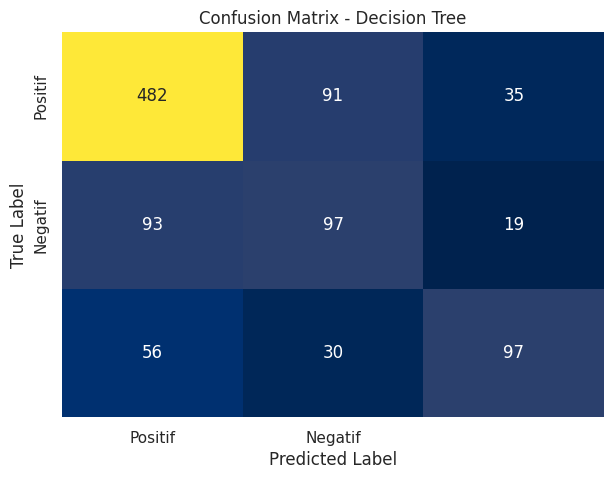

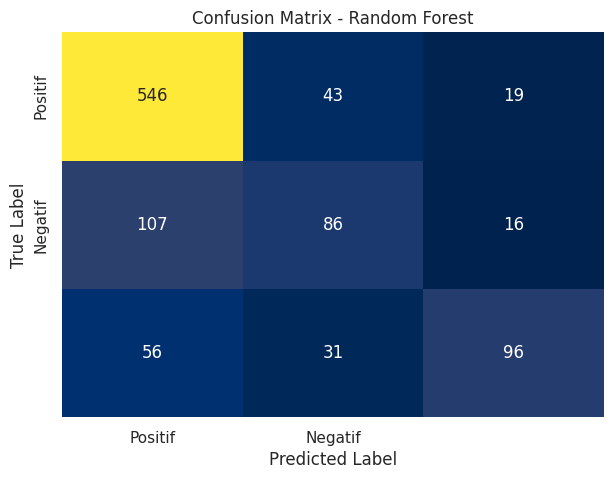

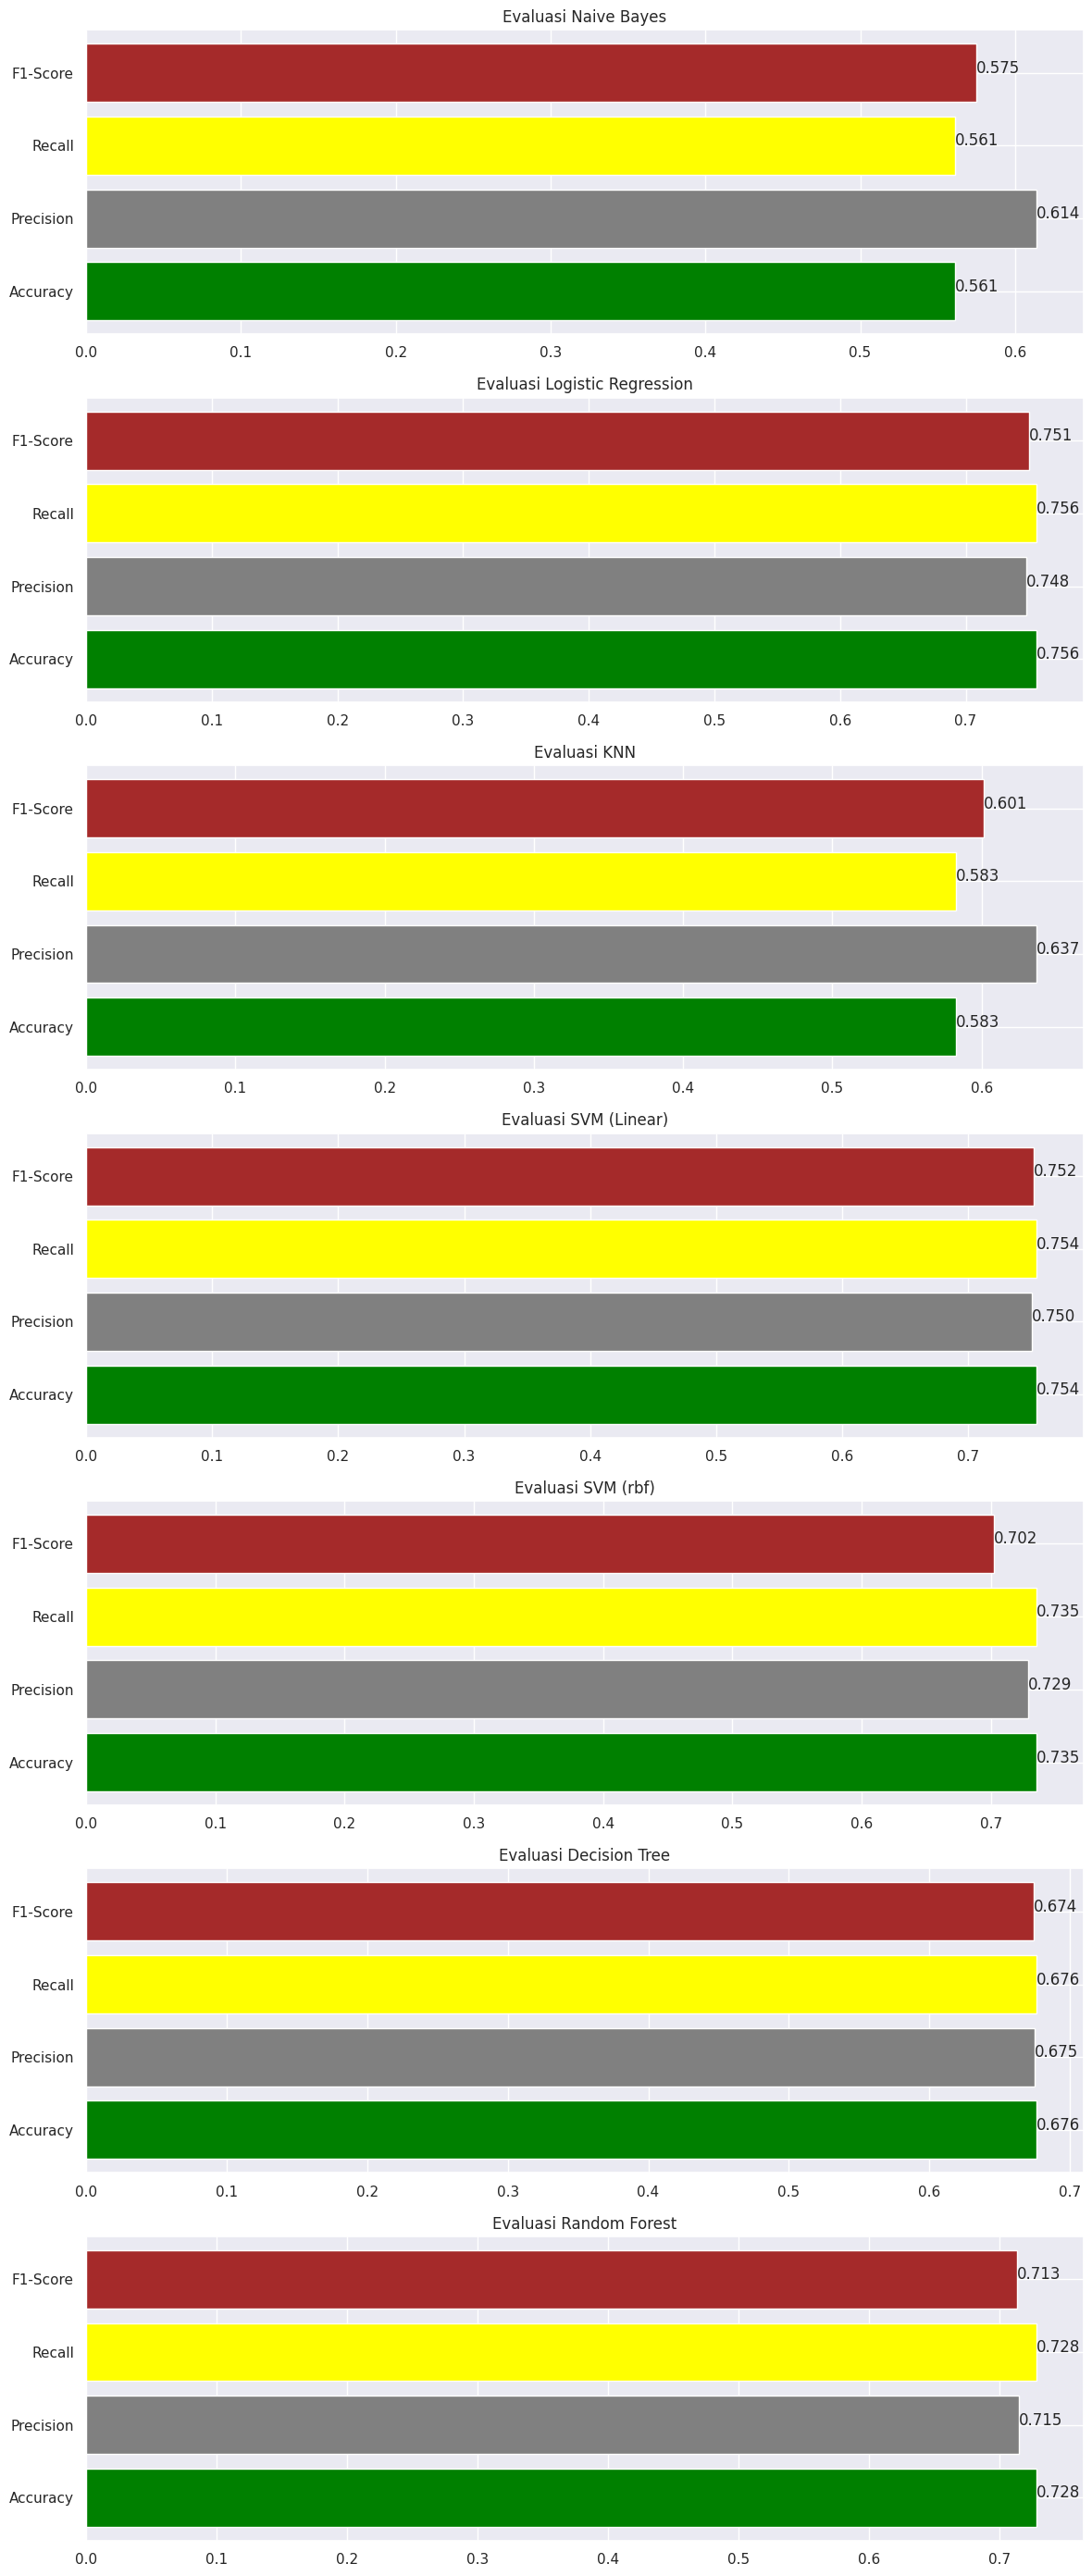

In [22]:
jenis_model = [
    ("Naive Bayes", GaussianNB()),
    ("Logistic Regression", LogisticRegression(random_state=0)),
    ("KNN", KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)),
    ("SVM (Linear)", SVC(kernel='linear', random_state=0)),
    ("SVM (rbf)", SVC(kernel='rbf', random_state=0)),
    ("Decision Tree", DecisionTreeClassifier(criterion='entropy', random_state=0)),
    ("Random Forest", RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0))
]

for i, (model_name, classifier) in enumerate(jenis_model):
    cm, accuracy, precision, recall, f1 = train_and_evaluate_model(X_train, X_test, y_train, y_test, classifier)

    # Plotting Confusion Matrix
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', cbar=False,
                xticklabels=['Positif', 'Negatif'], yticklabels=['Positif', 'Negatif'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')

    print("====================================")
    print(f"Model: {model_name}")
    print("Confusion Matrix:\n", cm)
    print("Accuracy: {:.3f}".format(accuracy))
    print("Precision: {:.3f}".format(precision))
    print("Recall: {:.3f}".format(recall))
    print("F1-Score: {:.3f}".format(f1))
    print("====================================")
    print()

fig, axs = plt.subplots(len(jenis_model), 1, figsize=(12, 4 * len(jenis_model)))

for i, (model_name, classifier) in enumerate(jenis_model):
    cm, accuracy, precision, recall, f1 = train_and_evaluate_model(X_train, X_test, y_train, y_test, classifier)
    # Bar Plot untuk Evaluasi
    labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    values = [accuracy, precision, recall, f1]
    colors = ['green', 'grey', 'yellow', 'brown']
    axs[i].barh(labels, values, color=colors)
    for index, value in enumerate(values):
        axs[i].text(value, index, str("{:.3f}".format(value)))

    axs[i].set_title(f'Evaluasi {model_name}')

plt.tight_layout()
plt.show()

## Ensemble : VotingClassifier

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=0)
clf2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf3 = SVC(kernel = 'linear', random_state = 0)
clf4 = GaussianNB()
clf5 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf6 = SVC(kernel = 'rbf', random_state = 0)
clf7 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)
clf7.fit(X_train, y_train)

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('dtc', clf2), ('svml', clf3), ('nb', clf4), ('knn', clf5), ('svmr', clf6), ('rf', clf7)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, eclf], ['Logistic Regression', 'Decision Tree Classifier', 'SVM (Linear)', 'Naive Bayes', 'KNN','SVM (rbf)', 'Random Forest', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.73 (+/- 0.01) [Logistic Regression]
Accuracy: 0.65 (+/- 0.02) [Decision Tree Classifier]
Accuracy: 0.71 (+/- 0.01) [SVM (Linear)]
Accuracy: 0.51 (+/- 0.01) [Naive Bayes]
Accuracy: 0.53 (+/- 0.04) [KNN]
Accuracy: 0.71 (+/- 0.02) [SVM (rbf)]
Accuracy: 0.70 (+/- 0.02) [Random Forest]
Accuracy: 0.73 (+/- 0.02) [Ensemble]


## K-Fold Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
scores = cross_val_score(classifier, X, y, cv=5)

print(f'Scores: {scores}')
print(f'Mean Score: {scores.mean()}')

Scores: [0.732 0.739 0.713 0.722 0.753]
Mean Score: 0.7318


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
scores = cross_val_score(classifier, X, y, cv=5)

print(f'Scores: {scores}')
print(f'Mean Score: {scores.mean()}')

Scores: [0.704 0.721 0.706 0.711 0.706]
Mean Score: 0.7095999999999999


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
scores = cross_val_score(classifier, X, y, cv=5)

print(f'Scores: {scores}')
print(f'Mean Score: {scores.mean()}')

Scores: [0.701 0.714 0.7   0.698 0.75 ]
Mean Score: 0.7126


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
scores = cross_val_score(classifier, X, y, cv=5)

print(f'Scores: {scores}')
print(f'Mean Score: {scores.mean()}')

Scores: [0.466 0.569 0.519 0.588 0.513]
Mean Score: 0.5309999999999999


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
scores = cross_val_score(classifier, X, y, cv=5)

print(f'Scores: {scores}')
print(f'Mean Score: {scores.mean()}')

Scores: [0.665 0.708 0.712 0.693 0.713]
Mean Score: 0.6982


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
scores = cross_val_score(classifier, X, y, cv=5)

print(f'Scores: {scores}')
print(f'Mean Score: {scores.mean()}')

Scores: [0.503 0.52  0.506 0.535 0.494]
Mean Score: 0.5115999999999999


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
scores = cross_val_score(classifier, X, y, cv=5)

print(f'Scores: {scores}')
print(f'Mean Score: {scores.mean()}')

Scores: [0.639 0.685 0.662 0.654 0.627]
Mean Score: 0.6534000000000001
